In [269]:
import math 
import csv 
import numpy as np
import matplotlib.pyplot as plt 

Read a CSV file, assume there are two fields, Name and Mark, with around 10 rows filled.
Calculate the Mean, Variance and Standard deviation, write it to the CSV and save it.
Also plot a graph of these values and mark the mean and SD on it

In [270]:
''' first i create the stat.csv file then insert mark into it'''
with open("stat.csv","w") as f :
  f.write("Name , Mark\n")
  st=""
  while st!="#":
    st=input("enter the name (# to stop)")
    if st!="#":
        f.write(st+",")
        mark=input("enter the mark ")
        f.write(mark+"\n")

enter the name (# to stop)qwe
enter the mark 12
enter the name (# to stop)ert
enter the mark 23
enter the name (# to stop)tyu
enter the mark 36
enter the name (# to stop)uio
enter the mark 69
enter the name (# to stop)asd
enter the mark 98
enter the name (# to stop)dfg
enter the mark 87
enter the name (# to stop)ghj
enter the mark 74
enter the name (# to stop)jkl
enter the mark 45
enter the name (# to stop)xcvb
enter the mark 25
enter the name (# to stop)dfgh4
enter the mark 54
enter the name (# to stop)dfgh
enter the mark 85
enter the name (# to stop)dfgh
enter the mark 2
enter the name (# to stop)#


In [272]:
''' here i append the mark into the list '''
f=open("stat.csv","r")
q=f.read().splitlines()
t=q[1:]
mark=[]
name=[]
for i in range(len(t)):
  w=t[i].split(",")
  mark.append(float(w[1]))
  name.append(str(w[0]))
print(mark)
print(name)
f.close()

[12.0, 23.0, 36.0, 69.0, 98.0, 87.0, 74.0, 45.0, 25.0, 54.0, 85.0, 2.0]
['qwe', 'ert', 'tyu', 'uio', 'asd', 'dfg', 'ghj', 'jkl', 'xcvb', 'dfgh4', 'dfgh', 'dfgh']


In [273]:
mean = sum(mark) / len(mark)
print(mean)
s=sum([((x-mean)**2) for x in mark])
sd = (s / (len(mark) - 1))**0.5
print(sd)
var=sd**2
print(var)

50.833333333333336
31.860015788768937
1015.060606060606


In [274]:
with open("stat.csv","a+") as f :
  f.write(" variance"+","+str(var)+"\n")
  f.write(" mean"+","+str(mean)+"\n")
  f.write("standered deviation "+","+str(sd)+"\n")

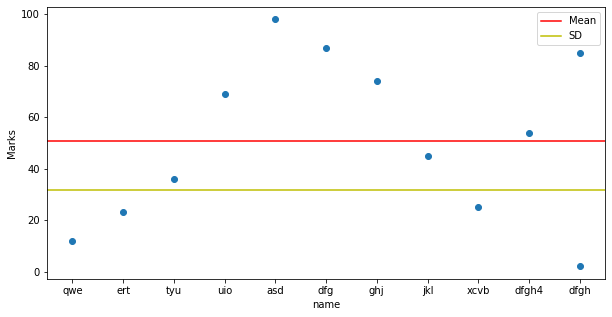

In [275]:
plt.figure(figsize=(10,5))
plt.scatter(name,mark)
plt.xlabel("name")
plt.ylabel("Marks")
plt.axhline(mean, color='r', label='Mean')
plt.axhline(sd, color='y', label='SD')
plt.legend()
#plt.axhline(var, color='g', label='Mean')
plt.show()

Get a number, Make the 2 MSBs one. Print the result – both as decimal and binary

In [256]:
# Get a number, Make the 2 MSBs one. Print the result – both as decimal and binar
num = int(input("Enter a number: "))
num |= 0b11000000
print("Result (decimal):", num)
print("Result (binary):", bin(num))

Enter a number: 948
Result (decimal): 1012
Result (binary): 0b1111110100


. A shopkeeper want to give his clients the balance amount with minimum number of notes.
Write a program to find out the notes and their counts, so that the total number of notes is
minimum.


In [257]:
note=[2000,500,200,100,50,20,5,2,1]
amount=int(input("enter the amount="))
price={}
for i in note:
  count=amount//i
  if count>0:
    price[i]=count
  amount=amount-(count*i)
print(price)

enter the amount=78954
{2000: 39, 500: 1, 200: 2, 50: 1, 2: 2}


Calculate Cos (x) using Maclaurin Series and plot the series with matplotlib

In [258]:
# first we found out the factorial of the given number 
def fact(k):
    pro=1
    for i in range(1,k+1):
          pro=pro*i
    return pro

In [259]:
def cos(k,x):
  l=[]
  for i in range(k):
    p=(((-1)**i)*(x**(2*i)))/(fact(2*i))
    l.append(p)
  return sum(l)

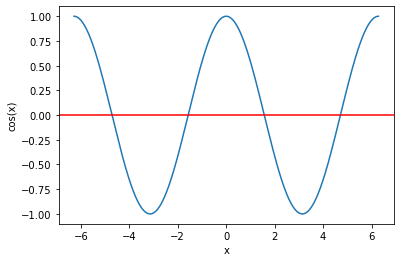

In [260]:
x=list(np.linspace(-2*3.14,2*3.14, 10000))
y=[cos(30,i) for i in x]
plt.plot(x, y)
plt.xlabel("x")
plt.axhline(0, color='r')
plt.ylabel("cos(x)")
plt.show()

Write a program to compare two JSONS which are structurally similar. The output should be
another JSON which contains the tags that has different values. You may expect the JSONS
can have nested structures.

In [261]:
import time 
from datetime import date
json1={"x":10.4,
       "y":20,
      "name": "raj",
      "bod":date(2023,2,25) 
      }
json2={"x":10,
       "y":20,
      "name": "ram",
      "bod":date(2023,5,25),
       "z":25}

In [262]:
result = {}
for key in json1.keys():
    if key in json2.keys():
        if isinstance(json1[key], (int, float)):
            if json1[key] != json2[key]:
                result[key] = abs(json1[key] - json2[key])
        elif isinstance(json1[key], str):
            if json1[key] != json2[key]:
                result[key] = "text change"
        elif isinstance(json1[key], date):
            if json1[key] != json2[key]:
                delta = (json2[key] - json1[key])
                result[key] = str(delta)
    else:
        result[key] = json1[key]

for key in json2.keys():
    if key not in json1:
        result[key] = "Only in 2"

print(result)

{'x': 0.40000000000000036, 'name': 'text change', 'bod': '89 days, 0:00:00', 'z': 'Only in 2'}


Caesar cipher is a method to encrypt (make a secret code) a string. It is achieved by
advancing each digit n places. Write a program to read a text file, get the string and encrypt
it first using Caesar and then XORing with a salt and write it back to <filename>_enc.txt.

In [276]:
def caesar_encrypt(text, key):
    result = ""
    for char in text:
        if char.isalpha():
            shifted = chr((ord(char) + key - 65) % 26 + 65)
            result += shifted
        else:
            result += char
    return result
    
def xor_encrypt(text, salt):
    result = ""
    for i in range(len(text)):
        result += chr(ord(text[i]) ^ ord(salt[i % len(salt)]))
    return result


In [281]:
key = 3
salt = "secrsdfet"
with open("input.txt","w") as f:
  f.write("first last thirs\n")
with open("input.txt","r") as f :
  p=f.read()
  q= caesar_encrypt(p, key)
  t=xor_encrypt(q, salt)
with open("input.txt","a+") as f:
  f.write(" the encrepted format are== \n")
  f.write(t+"\n")


In [282]:
f=open("input.txt")
p=f.read()
print(p)
f.close()

first last thirs
 the encrepted format are== 
<7"00D3/60E #!%$o

